#Importing Libraries

In [4]:
import re
import nltk
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import STOPWORDS

In [5]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="latin-1",header=None)
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
column_names = ["sentiment", "ids", "date", "flag", "user", "tweet"]
data.columns= column_names
data.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
df = data[["tweet", "sentiment"]].copy()
df.head()

,tweet,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [10]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(["amp", "rt", "lt", "gt"])

stemmer = PorterStemmer()

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https?://\S+", "", tweet)
    tweet = re.sub(r"@\w+|#", "", tweet)
    tweet = re.sub(r"[^\w\s]|[\d]", "", tweet)
    tweet = " ".join([stemmer.stem(word) for word in tweet.split() if word not in stop_words])
    return tweet

df["clean_tweet"] = df["tweet"].apply(clean_tweet)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet,sentiment,clean_tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,awww that bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,0,upset cant updat facebook text might cri resul...
2,@Kenichan I dived many times for the ball. Man...,0,dive mani time ball manag save rest go bound
3,my whole body feels itchy and like its on fire,0,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",0,behav im mad cant see


In [11]:
df['sentiment'].unique()

array([0, 4])

In [12]:
df["sentiment"] = df["sentiment"].replace({0: "Negative", 4: "Positive"})
df.head()

,tweet,sentiment,clean_tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative,awww that bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,Negative,upset cant updat facebook text might cri resul...
2,@Kenichan I dived many times for the ball. Man...,Negative,dive mani time ball manag save rest go bound
3,my whole body feels itchy and like its on fire,Negative,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",Negative,behav im mad cant see


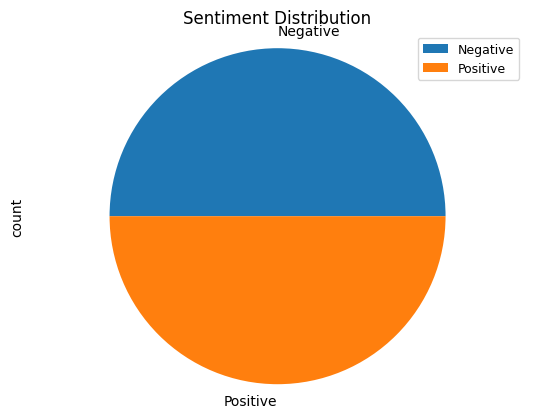

In [13]:
df["sentiment"].value_counts().plot(kind="pie", )

plt.title('Sentiment Distribution')
plt.axis('equal')
plt.legend(labels=df["sentiment"].value_counts().index, loc='upper right', fontsize=9)
plt.show()